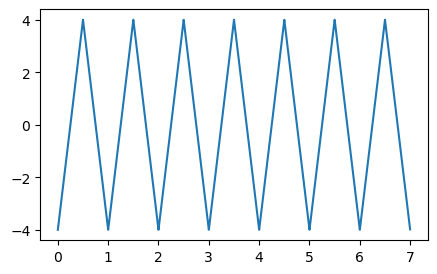

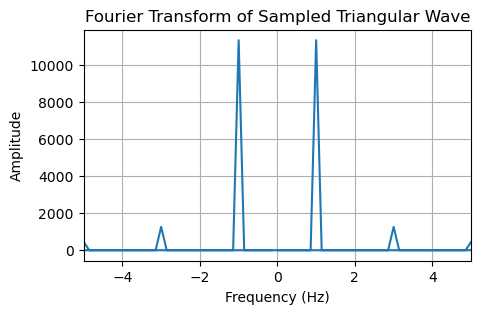

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from scipy.signal import resample

fs = 1000 
T = 7     

freq=1
amp=4

t = np.linspace(0, T, int(fs * T), endpoint=False)
triag = amp *sawtooth(2 * np.pi * freq * t,width=0.5)

triag_fft = np.fft.fft(triag)
fft_freq = np.fft.fftfreq(len(triag), 1/fs)

# Plot the Fourier Transform
plt.figure(figsize=(5, 3))
plt.plot(t,triag)
plt.show()
plt.figure(figsize=(5, 3))
plt.plot(fft_freq, np.abs(triag_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Sampled Triangular Wave')
plt.grid(True)
plt.xlim(-5,5)
plt.show()


4


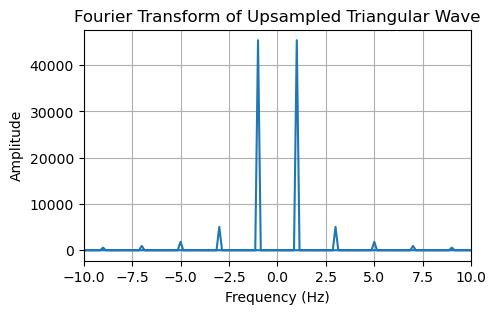

In [3]:

upsample_factor = eval(input("Enter the upsample factor:"))
print(upsample_factor)
zero_int=[]
for i in triag:
    zero_int.append(i)
    for j in range(upsample_factor-1):
        zero_int.append(0)
zero_int=np.array(zero_int)

upsampled_triangular_wave = resample(triag, len(triag)*upsample_factor)



upsampled_fft = np.fft.fft(upsampled_triangular_wave)
upsampled_fft_freq = np.fft.fftfreq(len(upsampled_triangular_wave), 1/(fs*upsample_factor))



plt.figure(figsize=(5, 3))
plt.plot(upsampled_fft_freq, np.abs(upsampled_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-10,10)

plt.title('Fourier Transform of Upsampled Triangular Wave')
plt.grid(True)
plt.show()



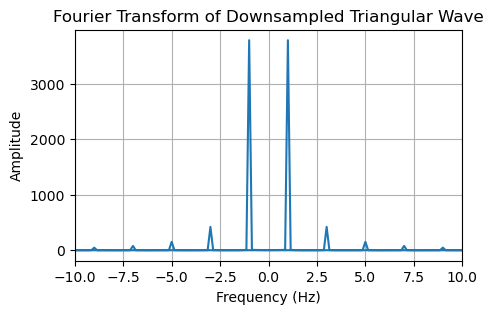

In [4]:

ds_factor = eval(input("Enter the downsample factor:"))

ds_triangular_wave = triag[::ds_factor]

downsampled_fft = np.fft.fft(ds_triangular_wave)
ds_fft_freq = np.fft.fftfreq(len(ds_triangular_wave), 1/(fs/ds_factor))

plt.figure(figsize=(5, 3))
plt.plot(ds_fft_freq, np.abs(downsampled_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Downsampled Triangular Wave')
plt.grid(True)
plt.xlim(-10,10)
plt.show()
